# importing libraries and reading data

In [18]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import cluster 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import warnings
df = pd.read_csv("CC GENERAL.csv") 
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# data cleaning

In [19]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [20]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mode()[0],inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0],inplace=True)
df=df.drop("CUST_ID", axis=1)
df=df.drop("PRC_FULL_PAYMENT", axis=1)
df=df.drop("TENURE", axis=1) #we see that we don't need this column because most of users have 12 months!
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,299.351881
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628


# Hierarchical clustering

In [21]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df)
        sil_score = metrics.silhouette_score(df, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

### Silhouette refers to a method of interpretation and validation of consistency within clusters of data.

In [22]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
0,2,0.518366,ward,2
3,8,0.338076,ward,8
5,12,0.337054,ward,12
4,10,0.328503,ward,10
2,6,0.319913,ward,6
8,18,0.318441,ward,18
7,16,0.315015,ward,16
6,14,0.312143,ward,14
1,4,0.306123,ward,4


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


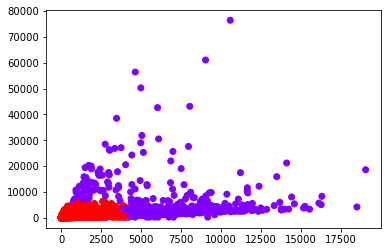

In [7]:
from sklearn.cluster import AgglomerativeClustering
DF = df.iloc[:,[0,14]].values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_labels=cluster.fit_predict(DF)  
print(cluster.labels_) 
print(cluster_labels) 

plt.scatter(DF[:,0],DF[:,1], c=cluster_labels, cmap='rainbow')

### normalizing the data 

In [23]:
scaler=StandardScaler()
df=scaler.fit_transform(df)
df=normalize(df)
df=pd.DataFrame(df)
pca=PCA(n_components=2)
df=pca.fit_transform(df)
df=pd.DataFrame(df)
df

,0,1
0,-0.467438,-0.695756
1,-0.574937,0.579723
2,0.354095,0.325570
3,-0.494367,-0.079616
4,-0.539796,-0.482477
...,...,...
8945,0.539247,-0.507645
8946,0.541612,-0.505602
8947,0.350829,-0.695960
8948,-0.681378,-0.468959


# K-means

In [25]:
sm=[]
k=range(1,20)
for K in k:
    km=KMeans(n_clusters=K)
    km=km.fit(df)
    sm.append(km.inertia_)

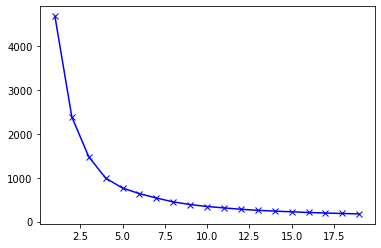

In [26]:
plt.plot(k,sm,'bx-')
plt.show()

#### we can see that k=3 approximatly

In [27]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [31]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,2
2,0
3,1
4,1
...,...
8945,0
8946,0
8947,0
8948,1


### PLOTING Kmeans

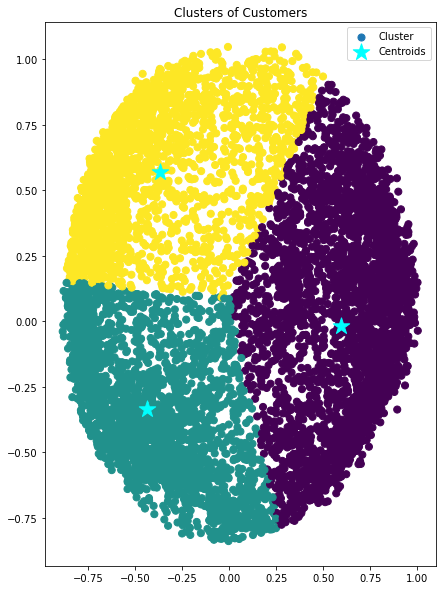

In [32]:
plt.figure(figsize=(7,10))

plt.scatter(df[0],df[1],s=50,c=labels,label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='cyan', marker='*', label = 'Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

#### we have three clusters so we do have three partitions!